**Проект: использование средств Python для расчёта и визуализации статистических свойств выборки**

Выборка — задача многоклассовой классификации [ирисов Фишера](https://).

In [69]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn import datasets
iris = datasets.load_iris()

In [70]:
dataset = iris['data']

In [71]:
#просмотр и анализ того, как оргнаизованы данные в наборах
dataset[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [72]:
#просмотр и анализ того, как оргнаизованы данные в наборах
target = iris['target']
target[0:5]

array([0, 0, 0, 0, 0])

In [73]:
#просмотр и анализ того, как организованы данные в наборах
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [74]:
#просмотр и анализ того, как оргнаизованы данные в наборах
target = iris.target_names

1. Посчитать основные характеристики выборки по каждому признаку:
- среднее;
- дисперсия;
- минимум;
- максимум;
- размах.

In [75]:
import numpy as np
import pandas as pd

In [76]:
# Превращение загруженных наборов в датафрейм
df_iris = pd.DataFrame(iris.data)
df_iris.columns = iris.feature_names
df_iris['No.sort']=iris.target
df_iris['Name of sort'] = df_iris['No.sort'].apply(lambda s: iris.target_names[s])
df_iris.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),No.sort,Name of sort
47,4.6,3.2,1.4,0.2,0,setosa


In [77]:
# просмотр характеристик датафрейма
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   No.sort            150 non-null    int32  
 5   Name of sort       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [78]:
# просмотр значений каждого признака (выявит, есть ли аномальные значения)
print(df_iris['No.sort'].sort_values().unique())
print(df_iris['sepal length (cm)'].sort_values().unique())
print(df_iris['sepal width (cm)'].sort_values().unique())
print(df_iris['petal length (cm)'].sort_values().unique())
print(df_iris['petal width (cm)'].sort_values().unique())

[0 1 2]
[4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.
 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.6 7.7 7.9]
[2.  2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8
 3.9 4.  4.1 4.2 4.4]
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9 3.  3.3 3.5 3.6 3.7 3.8 3.9 4.  4.1
 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.3 6.4 6.6 6.7 6.9]
[0.1 0.2 0.3 0.4 0.5 0.6 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1
 2.2 2.3 2.4 2.5]


In [79]:
# Расчет статистик по каждому признаку
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),No.sort
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


2. Визуализировать распределения признаков посредством seaborn.

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

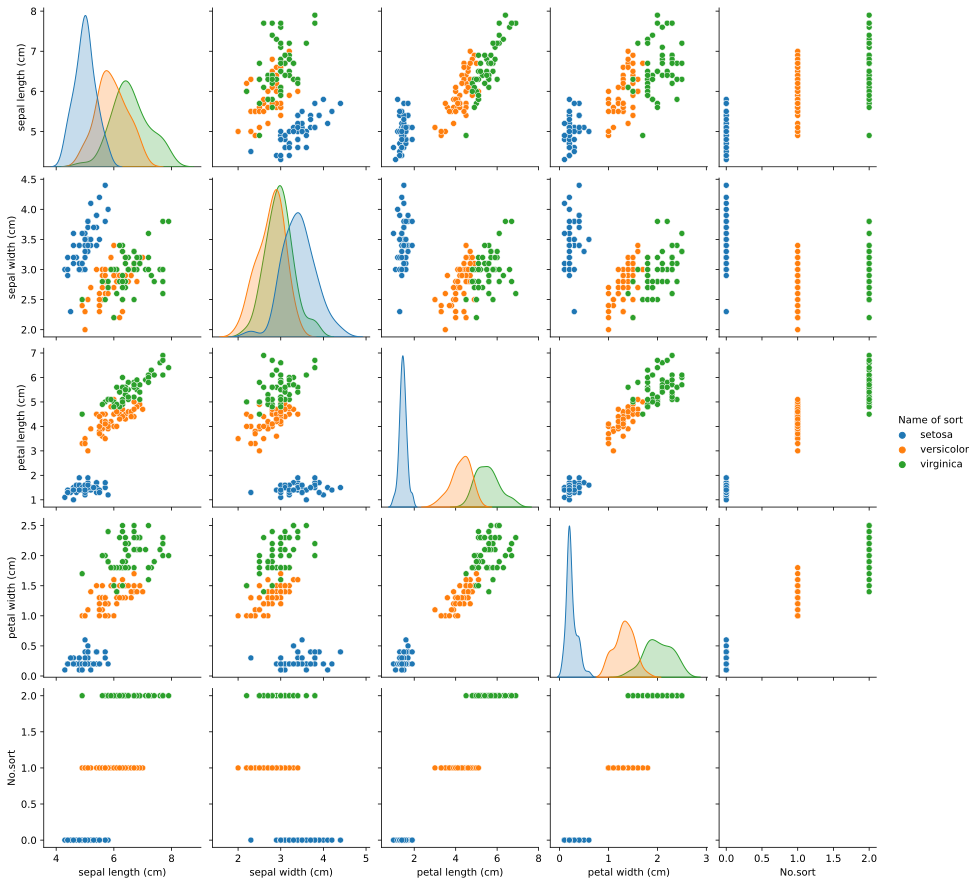

In [81]:
sns.pairplot(df_iris, hue='Name of sort')

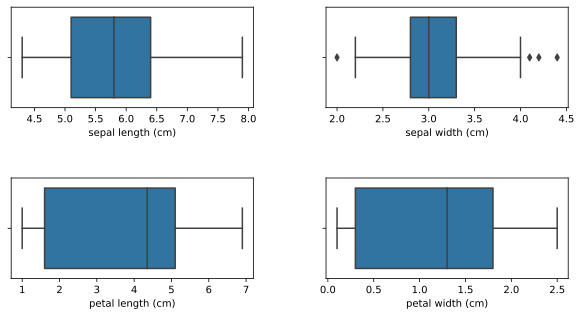

In [82]:
def feach_search(df, features):
    plt.figure(figsize=(10, 5))
    for i, f in enumerate(features):
        plt.subplot(2, 2, i+1)
        sns.boxplot(df[features[i]])
        plt.subplots_adjust(wspace=0.3, hspace=0.7)
feach_search(df_iris, feature_names)

<Figure size 720x432 with 0 Axes>

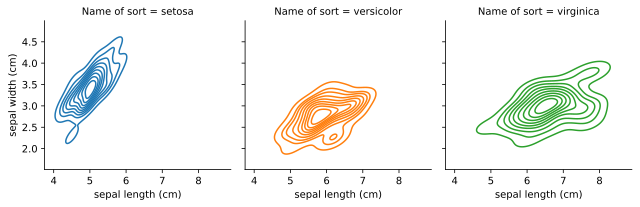

In [83]:
#созависимости признаков: длина и ширина чашелистиков
plt.figure(figsize=(10, 6))
vis_feach = sns.FacetGrid(df_iris, col='Name of sort', hue='Name of sort', col_wrap=3)
vis_feach.map(sns.kdeplot, 'sepal length (cm)', 'sepal width (cm)')

<Figure size 720x432 with 0 Axes>

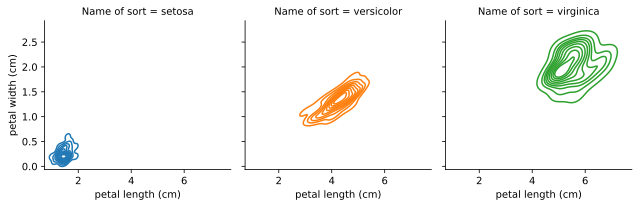

In [84]:
#созависимости признаков: длина и ширина лепестков
plt.figure(figsize=(10, 6))
vis_feach = sns.FacetGrid(df_iris, col='Name of sort', hue='Name of sort', col_wrap=3)
vis_feach.map(sns.kdeplot, 'petal length (cm)', 'petal width (cm)')

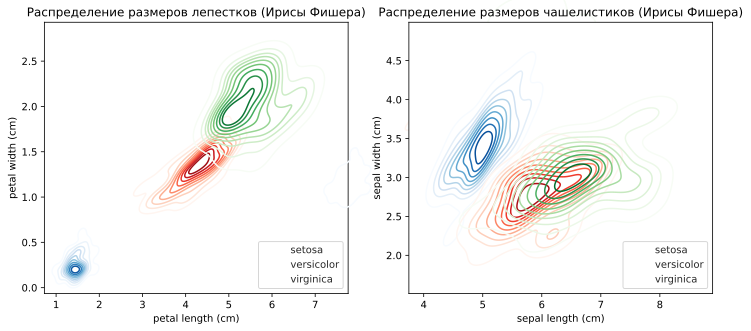

In [85]:
# Наилушую визуализация распределения значений признаков даст совмещение всех трех классов на одном графике
plt.figure(figsize=(12, 5))

#Диаграмма ядерной оценки плотности для лепестков
plt.subplot(1, 2, 1)
with sns.axes_style("darkgrid"):
    ax = sns.kdeplot(df_iris[df_iris['Name of sort']=='setosa']['petal length (cm)'], 
                     df_iris[df_iris['Name of sort']=='setosa']['petal width (cm)'], 
                     label="setosa", cmap='Blues')
    ax = sns.kdeplot(df_iris[df_iris['Name of sort']=='versicolor']['petal length (cm)'], 
                     df_iris[df_iris['Name of sort']=='versicolor']['petal width (cm)'], 
                     label="versicolor", cmap='Reds')
    ax = sns.kdeplot(df_iris[df_iris['Name of sort']=='virginica']['petal length (cm)'], 
                     df_iris[df_iris['Name of sort']=='virginica']['petal width (cm)'], 
                     label="virginica", cmap='Greens')
    ax.set_title("Распределение размеров лепестков (Ирисы Фишера)", loc='center')
    ax.legend(loc='lower right').get_frame().set_facecolor("white")
    
#Диаграмма ядерной оценки плотности для чашелистиков 
plt.subplot(1, 2, 2)
with sns.axes_style("darkgrid"):
    ax = sns.kdeplot(df_iris[df_iris['Name of sort']=='setosa']['sepal length (cm)'], 
                     df_iris[df_iris['Name of sort']=='setosa']['sepal width (cm)'], 
                     label="setosa", cmap='Blues')
    ax = sns.kdeplot(df_iris[df_iris['Name of sort']=='versicolor']['sepal length (cm)'], 
                     df_iris[df_iris['Name of sort']=='versicolor']['sepal width (cm)'], 
                     label="versicolor", cmap='Reds')
    ax = sns.kdeplot(df_iris[df_iris['Name of sort']=='virginica']['sepal length (cm)'], 
                     df_iris[df_iris['Name of sort']=='virginica']['sepal width (cm)'], 
                     label="virginica", cmap='Greens')
    ax.set_title("Распределение размеров чашелистиков (Ирисы Фишера)", loc='center')
    ax.legend(loc='lower right').get_frame().set_facecolor("white")

In [86]:
#Понижение размерности матрицы признаков, 
#так как интересно посмотреть зависит ли различимость классов сразу от всех четырех характеристик
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=1, learning_rate=150, random_state=10)
df_tsne = tsne_model.fit_transform(df_iris[feature_names]).tolist()
df_tsne_sepal = tsne_model.fit_transform(df_iris[feature_names[0:1]]).flatten()
df_tsne_petal = tsne_model.fit_transform(df_iris[feature_names[2:3]]).flatten()
df = pd.DataFrame(df_tsne, columns=["Generalizeg features"])
df['Sepal'] = df_tsne_sepal
df['Petal'] = df_tsne_petal
df['No.sort'] = df_iris['No.sort']
df['Name of sort'] = df_iris['Name of sort']

<AxesSubplot:xlabel='Sepal', ylabel='Petal'>

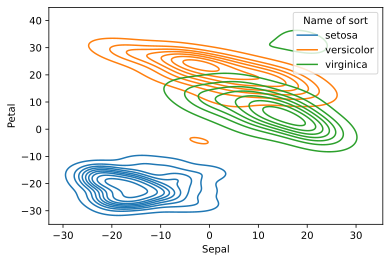

In [87]:
#визуализация TSNE-модели датасета
sns.kdeplot(df['Sepal'], df['Petal'], hue=df['Name of sort'])

<AxesSubplot:xlabel='No.sort', ylabel='Generalizeg features'>

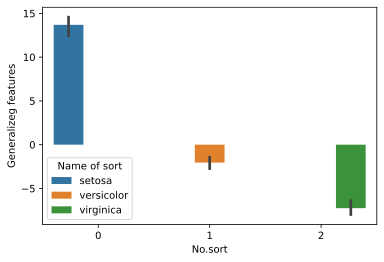

In [88]:
sns.barplot(df['No.sort'], df['Generalizeg features'], hue=df['Name of sort'])

3. Посчитать и визуализировать корреляционную матрицу.

<AxesSubplot:>

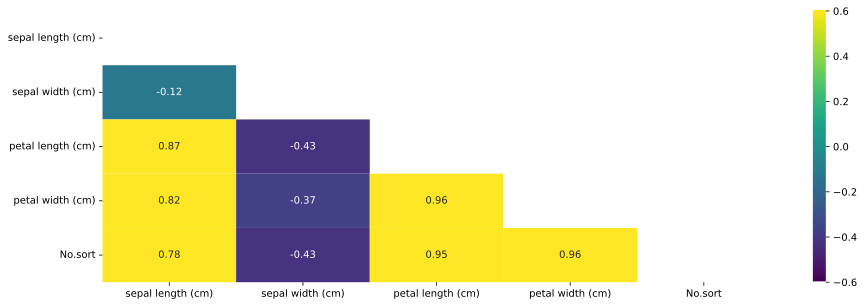

In [89]:
cor_matrix = np.triu(np.ones_like(df_iris.corr(), dtype=np.bool))
plt.figure(figsize=(15, 5))
sns.heatmap(df_iris.corr(), vmin=-0.6, vmax=0.6, mask=cor_matrix, annot=True, cmap='viridis') 

4. Проверить гипотезу о нормальности распределения для признаков 1 и 2.

In [90]:
from scipy import stats

In [91]:
#Критерий нормального распределения
# Нулевая гипотеза H0: распределение соответствует равномерному распределению
# Альтернативная гипотеза H1: распределение не соответствует равномерному распределению.
# Установим критерий значимости
# Если наблюдаемое р-значение окажется ниже, чем альфа, то мы заключаем, что результат является статистически значимым!
# В противном случае нулевая гипотеза (=распределение нормальное) отвергается

alpha = 0.05

In [92]:
#Применим тест Шапиро-Уилка, поскольку выборка небольшая
stat = []
pv = []
h0 = []
for f in iris.feature_names:
    res = stats.shapiro(df_iris[f])
    print(f"ПРИЗНАК {f}: \n{res}")
    stat.append(np.round(res[0], 6))
    pv.append(np.round(res[1], 10))
    if res[1] < alpha:
        h0.append('ПРИНИМАЕТСЯ')
        print('Гипотеза о соответсвии равномерному (нормальному) распределению ПРИНИМАЕТСЯ')
    else:
        h0.append( 'НЕ принимается')
        print('Гипотеза о соответсвии равномерному (нормальному распределению НЕ ПРИНИМАЕТСЯ')
df_check_h0 = pd.DataFrame({'feature': iris.feature_names, 'statistic': stat, 'p-value': pv, 'H0': h0}) 

ПРИЗНАК sepal length (cm): 
ShapiroResult(statistic=0.9760899543762207, pvalue=0.010180278681218624)
Гипотеза о соответсвии равномерному (нормальному) распределению ПРИНИМАЕТСЯ
ПРИЗНАК sepal width (cm): 
ShapiroResult(statistic=0.9849170446395874, pvalue=0.10113201290369034)
Гипотеза о соответсвии равномерному (нормальному распределению НЕ ПРИНИМАЕТСЯ
ПРИЗНАК petal length (cm): 
ShapiroResult(statistic=0.8762689232826233, pvalue=7.41295913542217e-10)
Гипотеза о соответсвии равномерному (нормальному) распределению ПРИНИМАЕТСЯ
ПРИЗНАК petal width (cm): 
ShapiroResult(statistic=0.9018341898918152, pvalue=1.680291461525485e-08)
Гипотеза о соответсвии равномерному (нормальному) распределению ПРИНИМАЕТСЯ


In [93]:
#Вывод оценок теста в виде датафрейма
print(df_check_h0)

             feature  statistic       p-value              H0
0  sepal length (cm)   0.976090  1.018028e-02     ПРИНИМАЕТСЯ
1   sepal width (cm)   0.984917  1.011320e-01  НЕ принимается
2  petal length (cm)   0.876269  7.000000e-10     ПРИНИМАЕТСЯ
3   petal width (cm)   0.901834  1.680000e-08     ПРИНИМАЕТСЯ


5. Произвести расчёт статистик из пункта 1 для каждого значения таргета (группировка).

In [94]:
#Расчет статистик по каждому сорту
for  k in target:
    print('Stat for ', k)
    print(pd.DataFrame(df_iris[df_iris['Name of sort']==k].describe()))
    print("========================================================================================")

Stat for  setosa
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  No.sort  
count         50.000000     50.0  
mean           0.246000      0.0  
std            0.105386      0.0  
min            0.100000      0.0  
25%            0.200000      0.0  
50%            0.200000      0.0  
75%            0.300000      0.0  
max            0.600000      0.0  
Stat for  versicolor
       sepal length (cm)  sepal width (cm)  petal length (cm)

6. Написать функцию, автоматизирующую EDA.

In [95]:
def eda(df):
    #функция позволяет получить общее представление о датасете
    #функция разделяется на подфункции, которые прописаны в предыдущих этапах анализа
    print("==========================================ОПИСАНИЕ ДАТАСЕТА============================================")
    print(df.info())
    print("==============================================СТАТИСТИКИ============================================")
    print(df.describe().drop(['No.sort'], axis=1))
    sns.pairplot(df, hue='Name of sort')
    plt.title(("================================РАСПРЕДЕЛЕНИЕ и СОЗАВИСИМОСТЬ ПРИЗНАКОВ ============================="))
    cor_matrix = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.corr(), vmin=-0.6, vmax=0.6, mask=cor_matrix, annot=True, cmap='viridis')
    plt.title("=============================================МАТРИЦА КОРРЕЛЯЦИЙ============================================")
    plt.figure(figsize=(10, 5))   
    features = df.columns[0:3]
    tsne_model = TSNE(n_components=1, learning_rate=150, random_state=10)
    df_tsne = tsne_model.fit_transform(df[features]).tolist()
    df_t = pd.DataFrame(df_tsne, columns=["Generalizeg features"])
    df_t['No.sort'] = df['No.sort']
    df_t['Name of sort'] = df['Name of sort']
    sns.barplot(df_t['No.sort'], df_t['Generalizeg features'], hue=df_t['Name of sort'])
    plt.legend()
    plt.title("========================================= ДЕЛИМОСТЬ на КЛАССЫ ============================================")

7. Описать основные выводы по каждому разделу проекта. Какие выводы можно сделать на основе проведённого анализа?

==============================================Выводы:===============================================================
1. Признаки, позволяющие отличить один сорт от другого (идут по убыванию значимости):
- petal width
- petal length
- sepal length

Признак, который слабо варьируется между сортами плюс есть выбросы в данных и распределение не соотвевует нормальному:
- sepal width
Признак можно отбросить и не закладывать в модель машинного обучения

2. Визуализации помогли вывить, что сорта различаются по характеристикам лепестков (petal). Четко определим сорт satosa на всех визуализациях

3. Поскольку три из четырех признаков похожи на нормальное распределение и их созависимости визуализируются как линейные, то можно применить линейную модель LinerRegressionClissifier

4. Для эксперимента ради 
    - можно удалить из датасета выбросы признака sepal width и повторить все  шаги развед.анализа
    - можно совсем удалить из датасета признак sepal width и повторить все  шаги развед.анализа
    Если в результате этих манипуляций визуализации дадут хорошую различимость классов , тогда можно применить модель классифиации LinerRegressionClissifier без "sepal width"
5. Признаки имеют одинаковый масштаб, поэтому можно не применять алгоритмы масштабирования , а использовать в моделях машиного обучения все значения "как есть"

==========================================ОПИСАНИЕ ДАТАСЕТА============================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   petal length (cm)  150 non-null    float64
 2   petal width (cm)   150 non-null    float64
 3   No.sort            150 non-null    int32  
 4   Name of sort       150 non-null    object 
dtypes: float64(3), int32(1), object(1)
memory usage: 5.4+ KB
None
==============================================СТАТИСТИКИ============================================
       sepal length (cm)  petal length (cm)  petal width (cm)
count         150.000000         150.000000        150.000000
mean            5.843333           3.758000          1.199333
std             0.828066           1.765298          0.762238
min             4.300000           1.000

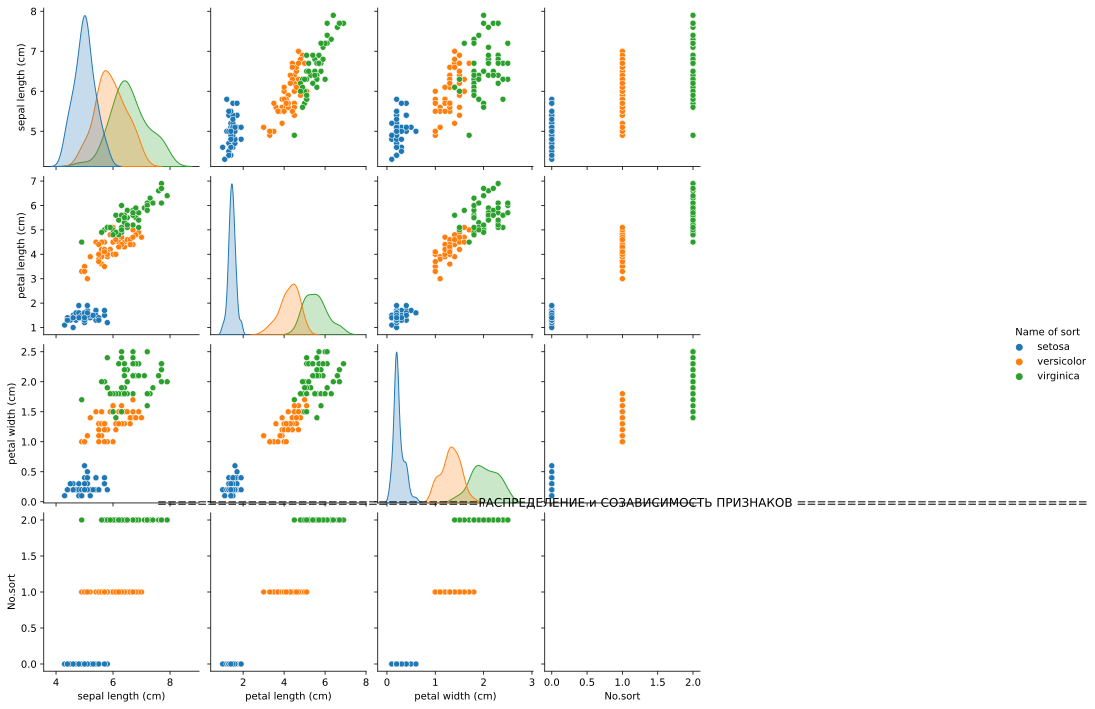

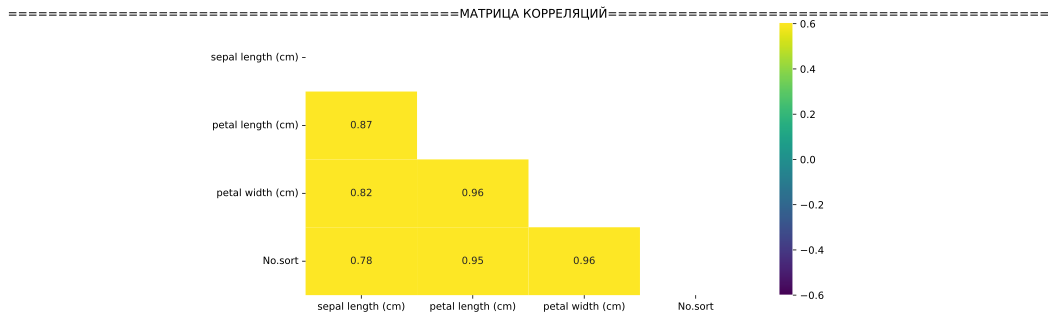

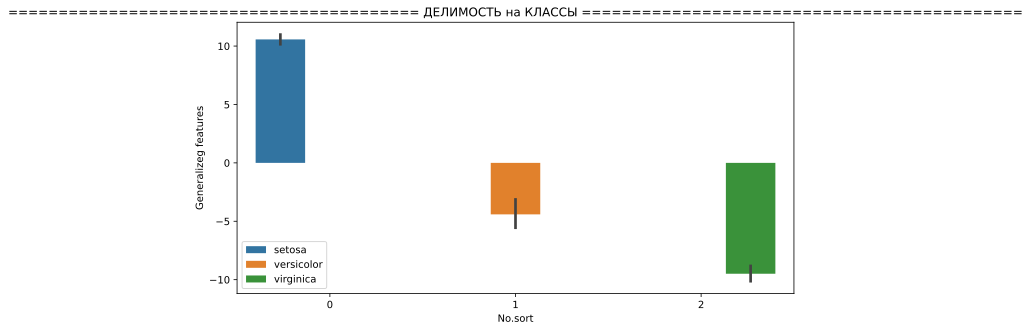

In [96]:
# Применение EDA-функции к датасету с отброшенным признаком
df_copy = df_iris.copy()
df_copy.drop(['sepal width (cm)'], axis=1, inplace=True)
eda(df_copy)

Вывод: после удаления признака sepal width сорта не стали более различимы для деления на классы.
Значит, для модели машинного обучения нужно использовать все 4 характеристики цветков